In [1]:
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
from config import db_password
import psycopg2

import tensorflow as tf
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
deaths_df = pd.read_csv('../../../data/cleaned_data/cre_svi_death_pct.csv', index_col = 'FIPS')
deaths_df = deaths_df.rename(columns = {'3/31/21':'first_yr_deaths'})
deaths_df

,POPUNI,PRED0_PE,PRED12_PE,PRED3_PE,first_yr_deaths,BEDS,dem_pct,Agreeableness,Belief In Science,Collectivism,...,Hopefulness,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,AREA_SQMI
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,55688,36.94,40.85,22.20,99,85.0,27.018365,86.279655,70.833333,57.142857,...,91.163142,26168.0,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,594.443459
1003,221898,35.43,40.81,23.76,301,332.0,22.409030,85.603337,63.268161,67.948815,...,82.484017,28069.0,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,1589.793007
1005,22023,22.81,41.64,35.54,55,74.0,45.788173,87.711609,63.046939,70.099756,...,61.927181,17249.0,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,885.001636
1007,20393,30.79,44.06,25.14,58,35.0,20.698280,84.830261,63.262028,72.034797,...,85.258871,18988.0,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,622.461089
1009,57697,31.53,41.51,26.97,131,40.0,9.569378,85.548096,33.333333,80.000000,...,79.492703,21033.0,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,644.830460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,41888,40.53,42.45,17.02,37,115.0,22.894957,83.811791,68.303853,68.673956,...,82.403142,30945.0,79.384759,79.347081,68.147062,73.938691,76.390464,67.420658,70.956334,10426.975725
56039,23390,31.00,49.45,19.55,9,48.0,66.599040,82.886955,73.489916,63.115088,...,84.036899,46499.0,71.547359,80.522872,65.399695,79.598153,79.698193,70.877600,70.938645,3996.844622
56041,20183,38.37,46.31,15.32,12,42.0,16.819960,84.272810,67.029022,67.552392,...,84.089095,25636.0,78.771570,77.859042,67.603416,69.705859,73.332067,67.404487,69.299391,2081.719807


In [3]:
# # use regex to split svi columns into distinct categories
# cols = df.columns.to_list()
# col_series = pd.Series(cols)
# pct_str = r'^[ERS]P+.'
# pct_form = col_series.str.contains(pct_str)
# pct_col = col_series[pct_form].to_list()
# flag_str = r'^F+.'
# flag_form = col_series.str.contains(flag_str)
# flag_col = col_series[flag_form].to_list()
# val_str = r'^E_+.'
# val_form = col_series.str.contains(val_str)
# val_col = col_series[val_form].to_list()
# non_svi = col_series[~pct_form & ~flag_form & ~val_form].to_list()


In [4]:
# # filter cases_df to only have svi estimated percentage columns
# cases_df = df.drop(columns = flag_col)
# cases_df = cases_df.drop(columns = val_col)
# cases_df.columns.to_list()
# cases_df = cases_df.merge(df['E_TOTPOP'], how = 'left', left_index=True, right_index=True)


In [5]:
deaths_df.columns.to_list()

['POPUNI',
 'PRED0_PE',
 'PRED12_PE',
 'PRED3_PE',
 'first_yr_deaths',
 'BEDS',
 'dem_pct',
 'Agreeableness',
 'Belief In Science',
 'Collectivism',
 'Conflict Awareness',
 'Conscientiousness',
 'Empathy',
 'Employment Rate',
 'Entrepreneurship',
 'Extraversion',
 'Gender Equality',
 'Hopefulness',
 'Income Per Capita',
 'Neuroticism',
 'Openness',
 'Religiosity',
 'Risk Taking',
 'Selflessness',
 'Tolerance',
 'Work Ethic',
 'AREA_SQMI']

In [6]:
# drop counties with 0 cases 
## these seem to be errors- mostly in Utah, some counties with large populations
zeros = deaths_df.loc[deaths_df['first_yr_deaths']==0]
deaths_df = deaths_df.drop(index = zeros.index)
deaths_df

,POPUNI,PRED0_PE,PRED12_PE,PRED3_PE,first_yr_deaths,BEDS,dem_pct,Agreeableness,Belief In Science,Collectivism,...,Hopefulness,Income Per Capita,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,AREA_SQMI
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,55688,36.94,40.85,22.20,99,85.0,27.018365,86.279655,70.833333,57.142857,...,91.163142,26168.0,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,594.443459
1003,221898,35.43,40.81,23.76,301,332.0,22.409030,85.603337,63.268161,67.948815,...,82.484017,28069.0,77.232120,80.086368,71.771566,67.272980,75.586018,66.983549,70.972246,1589.793007
1005,22023,22.81,41.64,35.54,55,74.0,45.788173,87.711609,63.046939,70.099756,...,61.927181,17249.0,80.375206,78.783778,73.657368,76.066481,78.753019,65.170377,68.704105,885.001636
1007,20393,30.79,44.06,25.14,58,35.0,20.698280,84.830261,63.262028,72.034797,...,85.258871,18988.0,80.813736,77.837027,69.974652,75.136154,76.929754,69.859503,67.931677,622.461089
1009,57697,31.53,41.51,26.97,131,40.0,9.569378,85.548096,33.333333,80.000000,...,79.492703,21033.0,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,644.830460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,41888,40.53,42.45,17.02,37,115.0,22.894957,83.811791,68.303853,68.673956,...,82.403142,30945.0,79.384759,79.347081,68.147062,73.938691,76.390464,67.420658,70.956334,10426.975725
56039,23390,31.00,49.45,19.55,9,48.0,66.599040,82.886955,73.489916,63.115088,...,84.036899,46499.0,71.547359,80.522872,65.399695,79.598153,79.698193,70.877600,70.938645,3996.844622
56041,20183,38.37,46.31,15.32,12,42.0,16.819960,84.272810,67.029022,67.552392,...,84.089095,25636.0,78.771570,77.859042,67.603416,69.705859,73.332067,67.404487,69.299391,2081.719807


In [7]:
deaths_df['pop_density'] = deaths_df['POPUNI']/deaths_df['AREA_SQMI']

In [8]:
#create variable for case% for each counties population
deaths_df['case_pct'] = deaths_df['first_yr_deaths']/deaths_df['POPUNI']*100
deaths_df['case_pct'].head()

FIPS
1001    0.177776
1003    0.135648
1005    0.249739
1007    0.284411
1009    0.227048
Name: case_pct, dtype: float64

In [9]:
deaths_df['case_pct'].describe()

count    3000.000000
mean        0.197046
std         0.113159
min         0.001390
25%         0.117239
50%         0.178936
75%         0.252381
max         0.865801
Name: case_pct, dtype: float64

## RF Regressor

In [10]:
deaths_df.shape

(3000, 29)

In [11]:
# Define feature set (x)
X = deaths_df.drop(['first_yr_deaths','case_pct','AREA_SQMI','POPUNI'], axis=1).values

#Define (y)
y= deaths_df['case_pct'].values

In [12]:
# # check columns list
# X.columns.to_list()

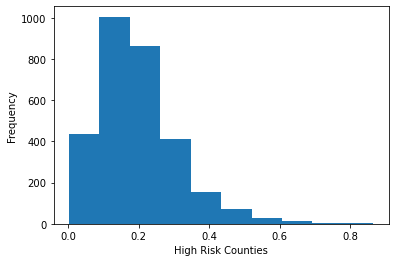

In [13]:
# frequency histogram to see how many counties are high risk and low risk
plt.hist(deaths_df["case_pct"])
plt.xlabel("High Risk Counties")
plt.ylabel("Frequency")
plt.show()

In [14]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 ,random_state= 42) 

In [15]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2100, 25)
(900, 25)
(2100,)
(900,)


In [16]:
len(X_train[0])

25

In [17]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 128
hidden_nodes_layer2 = 128
hidden_nodes_layer3 = 64

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()


2022-08-17 18:45:44.525301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 28,161
Trainable params: 28,161
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=300)

Epoch 1/300
66/66 [==============================] - 1s 2ms/step - loss: 0.1145 - mean_absolute_error: 0.1145
Epoch 2/300
66/66 [==============================] - 0s 4ms/step - loss: 0.0818 - mean_absolute_error: 0.0818
Epoch 3/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0749 - mean_absolute_error: 0.0749
Epoch 4/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0678 - mean_absolute_error: 0.0678
Epoch 5/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0651 - mean_absolute_error: 0.0651
Epoch 6/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0594 - mean_absolute_error: 0.0594
Epoch 7/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0569 - mean_absolute_error: 0.0569
Epoch 8/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0540 - mean_absolute_error: 0.0540
Epoch 9/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0537 - mean_absolute_error: 0.0537
Epoch 10/3

66/66 [==============================] - 0s 3ms/step - loss: 0.0173 - mean_absolute_error: 0.0173
Epoch 75/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0180 - mean_absolute_error: 0.0180
Epoch 76/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0167 - mean_absolute_error: 0.0167
Epoch 77/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0169 - mean_absolute_error: 0.0169
Epoch 78/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0177 - mean_absolute_error: 0.0177
Epoch 79/300
66/66 [==============================] - 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158
Epoch 80/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0164 - mean_absolute_error: 0.0164
Epoch 81/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0171 - mean_absolute_error: 0.0171
Epoch 82/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0156 - mean_absolute_error: 0.0156
Epoch 83/300
6

66/66 [==============================] - 0s 3ms/step - loss: 0.0127 - mean_absolute_error: 0.0127
Epoch 148/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 149/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 150/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0125 - mean_absolute_error: 0.0125
Epoch 151/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 152/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 153/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_absolute_error: 0.0124
Epoch 154/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 155/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 

66/66 [==============================] - 0s 2ms/step - loss: 0.0101 - mean_absolute_error: 0.0101
Epoch 221/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0104 - mean_absolute_error: 0.0104
Epoch 222/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0101 - mean_absolute_error: 0.0101
Epoch 223/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0103 - mean_absolute_error: 0.0103
Epoch 224/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0109 - mean_absolute_error: 0.0109
Epoch 225/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0100 - mean_absolute_error: 0.0100
Epoch 226/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 227/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0108 - mean_absolute_error: 0.0108
Epoch 228/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0105 - mean_absolute_error: 0.0105
Epoch 

66/66 [==============================] - 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087
Epoch 294/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0092 - mean_absolute_error: 0.0092
Epoch 295/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0091 - mean_absolute_error: 0.0091
Epoch 296/300
66/66 [==============================] - 0s 3ms/step - loss: 0.0094 - mean_absolute_error: 0.0094
Epoch 297/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0090 - mean_absolute_error: 0.0090
Epoch 298/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 299/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0089 - mean_absolute_error: 0.0089
Epoch 300/300
66/66 [==============================] - 0s 2ms/step - loss: 0.0090 - mean_absolute_error: 0.0090


In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 0s - loss: 0.0767 - mean_absolute_error: 0.0767 - 210ms/epoch - 7ms/step
Loss: 0.07665082067251205, Accuracy: 0.07665082067251205


In [22]:
# turn model predictions into dataframe
preds = pd.DataFrame(nn.predict(X_test_scaled), columns = ['pred'])
preds['pred_rank'] = preds.index
preds.sort_values(by = ['pred'], ascending = False, ignore_index = True, inplace = True)
preds

29/29 [==============================] - 0s 2ms/step


,pred,pred_rank
0,0.507846,513
1,0.479137,339
2,0.472565,282
3,0.461983,297
4,0.452145,506
...,...,...
895,0.022415,44
896,0.013792,137
897,0.012752,651
898,0.001200,186


In [23]:
#turn test values into dataframe
actuals = pd.DataFrame(y_test, columns = ['act'])
actuals['act_rank'] = actuals.index
actuals.sort_values(by = ['act'],ascending = False, ignore_index = True, inplace =True)
actuals

,act,act_rank
0,0.716846,662
1,0.704225,489
2,0.662589,187
3,0.650195,710
4,0.638613,578
...,...,...
895,0.017095,777
896,0.014209,883
897,0.008065,638
898,0.007495,125


In [24]:
# merege acutal and predicted dataframes
ranked_results = actuals.merge(preds, how = 'inner', left_index=True, right_index=True)
ranked = ranked_results.head(180)
ranked

,act,act_rank,pred,pred_rank
0,0.716846,662,0.507846,513
1,0.704225,489,0.479137,339
2,0.662589,187,0.472565,282
3,0.650195,710,0.461983,297
4,0.638613,578,0.452145,506
...,...,...,...,...
175,0.280261,712,0.244187,499
176,0.279680,97,0.243547,9
177,0.279395,615,0.243232,168
178,0.278818,198,0.242507,306


In [25]:
correct = 0
correct_index = []

for index, row in ranked.iterrows():
    if row['pred_rank'] in ranked['act_rank'].values:
        correct = correct+1
        correct_index.append(row['pred_rank'])
    

In [26]:
correct

87

In [27]:
results = actuals.merge(preds, how = 'inner', left_on='act_rank', right_on='pred_rank')
results

,act,act_rank,pred,pred_rank
0,0.716846,662,0.410980,662
1,0.704225,489,0.114952,489
2,0.662589,187,0.291988,187
3,0.650195,710,0.188471,710
4,0.638613,578,0.237382,578
...,...,...,...,...
895,0.017095,777,0.059597,777
896,0.014209,883,0.157941,883
897,0.008065,638,0.037196,638
898,0.007495,125,0.177465,125


In [28]:
# check how big the errors are on each prediction
results['error'] = results['act']-results['pred']
results['abs_error'] = abs(results['error'])
results

,act,act_rank,pred,pred_rank,error,abs_error
0,0.716846,662,0.410980,662,0.305866,0.305866
1,0.704225,489,0.114952,489,0.589273,0.589273
2,0.662589,187,0.291988,187,0.370601,0.370601
3,0.650195,710,0.188471,710,0.461724,0.461724
4,0.638613,578,0.237382,578,0.401231,0.401231
...,...,...,...,...,...,...
895,0.017095,777,0.059597,777,-0.042503,0.042503
896,0.014209,883,0.157941,883,-0.143733,0.143733
897,0.008065,638,0.037196,638,-0.029131,0.029131
898,0.007495,125,0.177465,125,-0.169970,0.169970


In [29]:
results.sort_values(by= ['act'], ignore_index=True)

,act,act_rank,pred,pred_rank,error,abs_error
0,0.007141,420,0.098781,420,-0.091639,0.091639
1,0.007495,125,0.177465,125,-0.169970,0.169970
2,0.008065,638,0.037196,638,-0.029131,0.029131
3,0.014209,883,0.157941,883,-0.143733,0.143733
4,0.017095,777,0.059597,777,-0.042503,0.042503
...,...,...,...,...,...,...
895,0.638613,578,0.237382,578,0.401231,0.401231
896,0.650195,710,0.188471,710,0.461724,0.461724
897,0.662589,187,0.291988,187,0.370601,0.370601
898,0.704225,489,0.114952,489,0.589273,0.589273


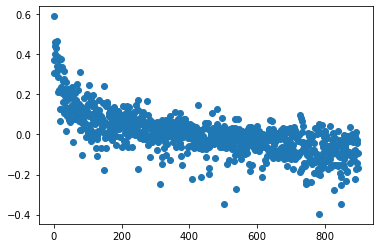

In [30]:
#plot the errors
plt.scatter(results.index,results['error'])

In [31]:
# explore errors
results['error'].describe()

count    900.000000
mean       0.004406
std        0.107960
min       -0.396476
25%       -0.056565
50%       -0.002663
75%        0.056967
max        0.589273
Name: error, dtype: float64

In [32]:
#explor absolute error
results['abs_error'].describe()

count    900.000000
mean       0.076651
std        0.076112
min        0.000210
25%        0.023751
50%        0.056817
75%        0.106214
max        0.589273
Name: abs_error, dtype: float64

In [33]:
#explore case percents
results['act'].describe()

count    900.000000
mean       0.194706
std        0.115863
min        0.007141
25%        0.112095
50%        0.175738
75%        0.252518
max        0.716846
Name: act, dtype: float64